In [1]:
import numpy as np
from PIL import Image

from utilFuncs import show_image, show_best_worst, iterate_gen

In [2]:
IMG_SIZE = (32, 32)
FILTER_SIZE = (3, 3)
FILTER_ALPHA = 0.2
FILTER = np.ones(shape = FILTER_SIZE, dtype = np.float64) * FILTER_ALPHA
FILTER_MAX_POS = (IMG_SIZE[0] + FILTER_SIZE[0] - 1, IMG_SIZE[1] + FILTER_SIZE[1] - 1)
OUTPUT_SIZE = (FILTER_MAX_POS[0] + FILTER_SIZE[0] - 1, FILTER_MAX_POS[1] + FILTER_SIZE[1] - 1)
POPULATION_SIZE = 100
ELITISM = 20
MUTATE_PROB = 0.1
GENERATIONS = 100
FILTER_MAX_POS, OUTPUT_SIZE

((34, 34), (36, 36))

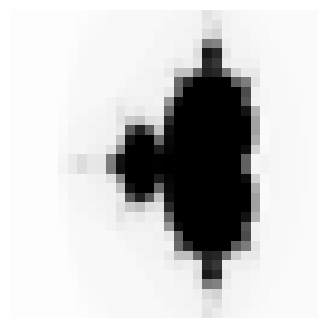

In [3]:
img_arr = np.array(Image.open("mandelbrot.png").convert('L').resize(IMG_SIZE)) / 255
show_image(img_arr)

In [4]:
FILTER_COUNT = int((img_arr.sum() / FILTER.sum()) * 1.1)
FILTER_COUNT

487

Best score: 316.361 | Worst score: 412.424


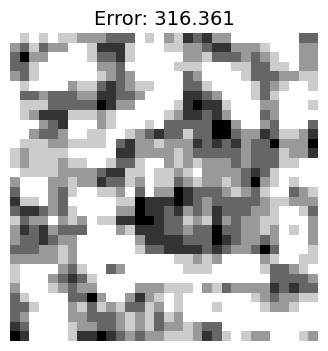

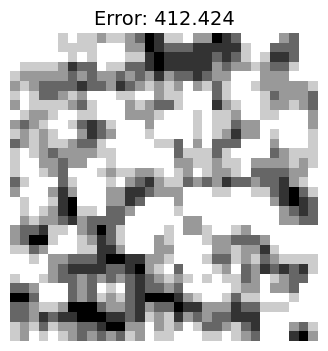

In [5]:
pop_filter_pos = [
    np.vstack((
        np.random.randint(FILTER_MAX_POS[0], size = FILTER_COUNT),
        np.random.randint(FILTER_MAX_POS[1], size = FILTER_COUNT),
    )).T
    for _ in range(POPULATION_SIZE)
]

show_best_worst(pop_filter_pos, img_arr, FILTER, OUTPUT_SIZE)

Gen: 1 | Best score: 316.361 | Worst score: 412.424
Gen: 2 | Best score: 316.361 | Worst score: 415.698
Gen: 3 | Best score: 315.098 | Worst score: 411.329
Gen: 4 | Best score: 304.733 | Worst score: 401.325
Gen: 5 | Best score: 299.212 | Worst score: 402.129
Gen: 6 | Best score: 286.086 | Worst score: 391.576
Gen: 7 | Best score: 286.086 | Worst score: 384.957
Gen: 8 | Best score: 286.086 | Worst score: 379.247
Gen: 9 | Best score: 286.086 | Worst score: 378.62
Gen: 10 | Best score: 286.086 | Worst score: 373.933
Gen: 11 | Best score: 262.537 | Worst score: 365.361
Gen: 12 | Best score: 262.537 | Worst score: 348.549
Gen: 13 | Best score: 262.537 | Worst score: 351.549
Gen: 14 | Best score: 262.537 | Worst score: 358.192
Gen: 15 | Best score: 262.537 | Worst score: 353.082
Gen: 16 | Best score: 262.537 | Worst score: 342.341
Gen: 17 | Best score: 262.537 | Worst score: 344.718
Gen: 18 | Best score: 262.537 | Worst score: 357.078
Gen: 19 | Best score: 260.561 | Worst score: 373.078
Gen

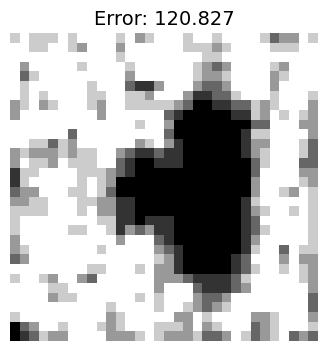

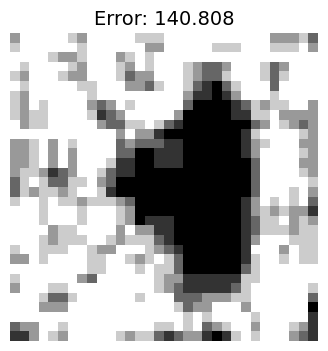

In [6]:
for gen in range(GENERATIONS):
    print(f"Gen: {gen + 1} | ", end = "")
    pop_filter_pos = iterate_gen(
        pop_filter_pos,
        img_arr,
        FILTER,
        OUTPUT_SIZE,
        ELITISM,
        MUTATE_PROB,
        FILTER_MAX_POS
    )

show_best_worst(pop_filter_pos, img_arr, FILTER, OUTPUT_SIZE)